In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats

from scipy.stats import spearmanr,pointbiserialr  # for Spearman Correlation and Biserial
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import anderson, norm, uniform
from skgof import cvm_test, ks_test
import statsmodels.stats.diagnostic as sm_diagnostic

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\user\Miniconda3\lib\site-packages\skgof\ecdfgof.py:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  from .cvmdist import cvm_unif


In [2]:
#This is the first dataset with data about temperature, fog precence, wind speed and precipitation

In [3]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\data\3\temperature_data.csv",parse_dates=['Date'])
df = data.copy()


In [4]:
df.head(25)

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,2020-01-22,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,2020-01-23,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,2020-01-24,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,2020-01-25,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,2020-01-26,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1
5,2020-01-27,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.11,3.7,0.04,0
6,2020-01-28,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.39,2.4,0.00,0
7,2020-01-29,NaN,Afghanistan,0,0,0,0,33.0,65.0,-9.33,2.4,0.00,0
8,2020-01-30,NaN,Afghanistan,0,0,0,0,33.0,65.0,-9.33,2.4,0.00,0
9,2020-01-31,NaN,Afghanistan,0,0,0,0,33.0,65.0,-14.67,1.9,0.00,1


In [5]:
print(df['Date'])

0       2020-01-22
1       2020-01-23
2       2020-01-24
3       2020-01-25
4       2020-01-26
           ...    
20283   2020-03-26
20284   2020-03-27
20285   2020-03-28
20286   2020-03-29
20287   2020-03-30
Name: Date, Length: 20288, dtype: datetime64[ns]


In [6]:
#import datetime

In [7]:
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')

In [8]:
#Remove the dates where the cases are zero

In [9]:
pf=df[df.Cumulative_cases != 0]

In [10]:
pf.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
33,2020-02-24,NaN,Afghanistan,1,0,1,0,33.0,65.0,4.44,4.0,0.47,1
34,2020-02-25,NaN,Afghanistan,1,0,0,0,33.0,65.0,4.56,5.8,0.00,1
35,2020-02-26,NaN,Afghanistan,1,0,0,0,33.0,65.0,8.17,6.2,0.00,1
36,2020-02-27,NaN,Afghanistan,1,0,0,0,33.0,65.0,4.06,5.8,1.57,1
37,2020-02-28,NaN,Afghanistan,1,0,0,0,33.0,65.0,2.50,2.8,0.47,1


In [11]:
#Work on the 15 first dates 

In [12]:
pf.set_index('Date',inplace=True) #set date as the index

In [13]:
pf1= pf['01-22-2020':'02-05-2020']

In [14]:
pf1.head(15)

,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,,,,,,
2020-02-03,NaN,Afghanistan,1,0,0,0,33.0000,65.0000,2.39,5.8,0.00,1
2020-02-03,NaN,Algeria,3,0,2,0,28.0339,1.6596,22.83,2.8,0.00,0
2020-02-03,NaN,Andorra,1,0,1,0,42.5063,1.5218,-0.33,1.7,0.06,0
2020-02-03,NaN,Armenia,1,0,0,0,40.0691,45.0382,-0.28,0.0,0.08,1
2020-01-26,New South Wales,Australia,3,0,3,0,-33.8688,151.2093,27.00,0.0,0.00,0
2020-01-27,New South Wales,Australia,4,0,1,0,-33.8688,151.2093,25.61,0.0,0.00,0
2020-01-28,New South Wales,Australia,4,0,0,0,-33.8688,151.2093,25.44,0.0,0.00,0
2020-01-29,New South Wales,Australia,4,0,0,0,-33.8688,151.2093,24.06,0.0,0.00,0
2020-01-30,New South Wales,Australia,4,0,0,0,-33.8688,151.2093,25.94,0.0,0.00,0


In [15]:
pf2 = pf1.drop(['State','Daily_cases','Daily_death','Latitude','Longitude'], axis=1)

In [16]:
pf2.head()

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,
2020-02-03,Afghanistan,1,0,2.39,5.8,0.00,1
2020-02-03,Algeria,3,0,22.83,2.8,0.00,0
2020-02-03,Andorra,1,0,-0.33,1.7,0.06,0
2020-02-03,Armenia,1,0,-0.28,0.0,0.08,1
2020-01-26,Australia,3,0,27.00,0.0,0.00,0


In [17]:
#Mean for each group of countries
country_list = pf2['Country'].unique()
cumulated_cases = []
deaths = []
temperature = []
wind = []
precipitation = []
fog = []

for country in country_list:
    country_wise = pf2['Country'] == country  
    test_data = pf2[country_wise]
    
    cumulated_cases.append(test_data['Cumulative_cases'].mean())
    deaths.append(test_data['Cumulative_death'].mean())
    temperature.append(test_data['Temperature'].mean())
    wind.append(test_data['Wind_speed'].mean())
    precipitation.append(test_data['Precipitation'].mean())
    fog.append(test_data['Fog_Presence'].mean())
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Country' : country_list, 'Cumulative_cases' : cumulated_cases, 'Cumulative_death' : deaths, 'Temperature':temperature,'Wind_speed':wind,'Precipitation':precipitation,'Fog_Presence':fog}
country_dataset = pd.DataFrame(country_dataset) 

In [18]:
country_dataset.head()

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
0,Afghanistan,1.00,0.00,2.39,5.800,0.0000,1.00
1,Algeria,3.00,0.00,22.83,2.800,0.0000,0.00
2,Andorra,1.00,0.00,-0.33,1.700,0.0600,0.00
3,Armenia,1.00,0.00,-0.28,0.000,0.0800,1.00
4,Australia,3.28,0.04,23.26,4.308,0.0348,0.24


In [19]:
country_dataset.corr()

,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Cumulative_cases,1.000000,0.924657,-0.090330,0.239559,0.198495,-0.008794
Cumulative_death,0.924657,1.000000,-0.049295,0.245077,0.030281,-0.062580
Temperature,-0.090330,-0.049295,1.000000,-0.142965,-0.120473,-0.367650
Wind_speed,0.239559,0.245077,-0.142965,1.000000,0.069537,0.127435
Precipitation,0.198495,0.030281,-0.120473,0.069537,1.000000,0.369077
Fog_Presence,-0.008794,-0.062580,-0.367650,0.127435,0.369077,1.000000


In [22]:
pfc = country_dataset.drop('Country', axis=1)

In [23]:
#Remove outliers with z-score
z_scores = stats.zscore(pfc)
#calculate z-scores of `pf5`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = pfc[filtered_entries]

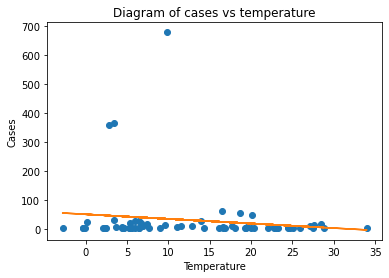

In [24]:
xi = new_df.Temperature
y = new_df.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

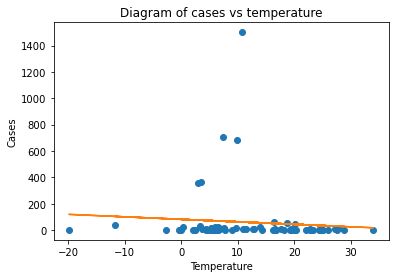

In [26]:
#With the outliers
xi = country_dataset.Temperature
y = country_dataset.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

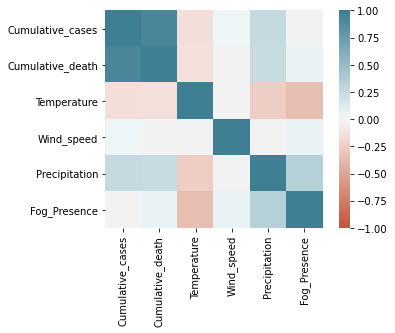

In [27]:
corr = new_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

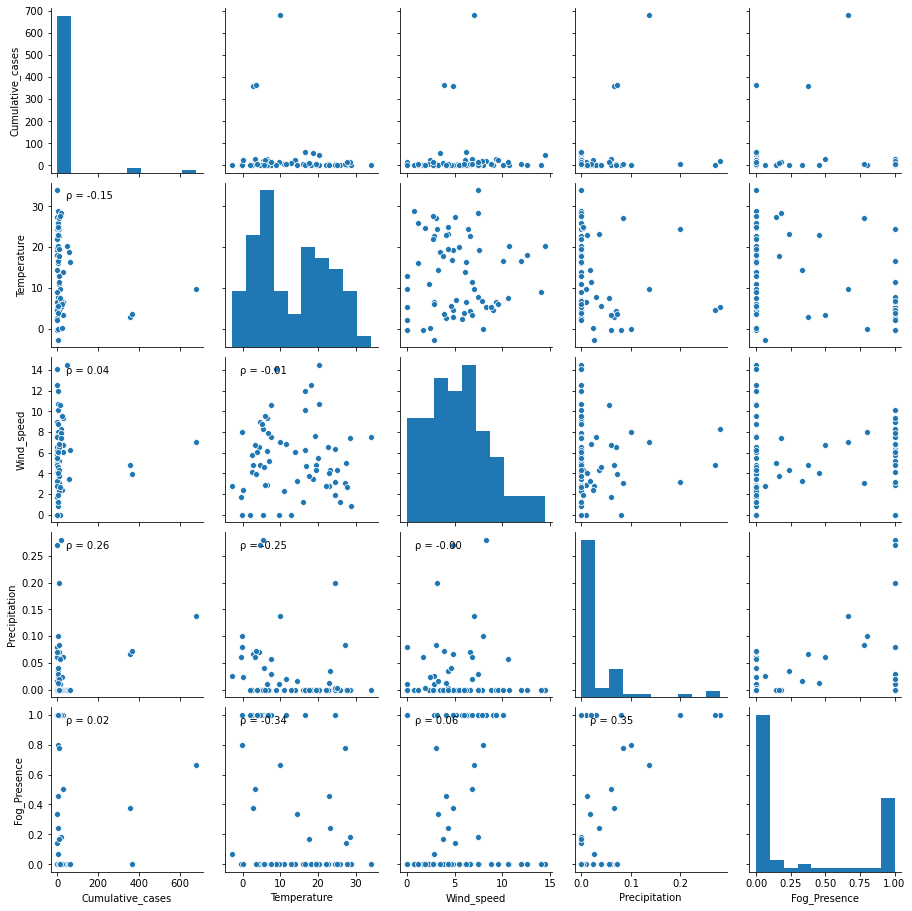

In [28]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(new_df, vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

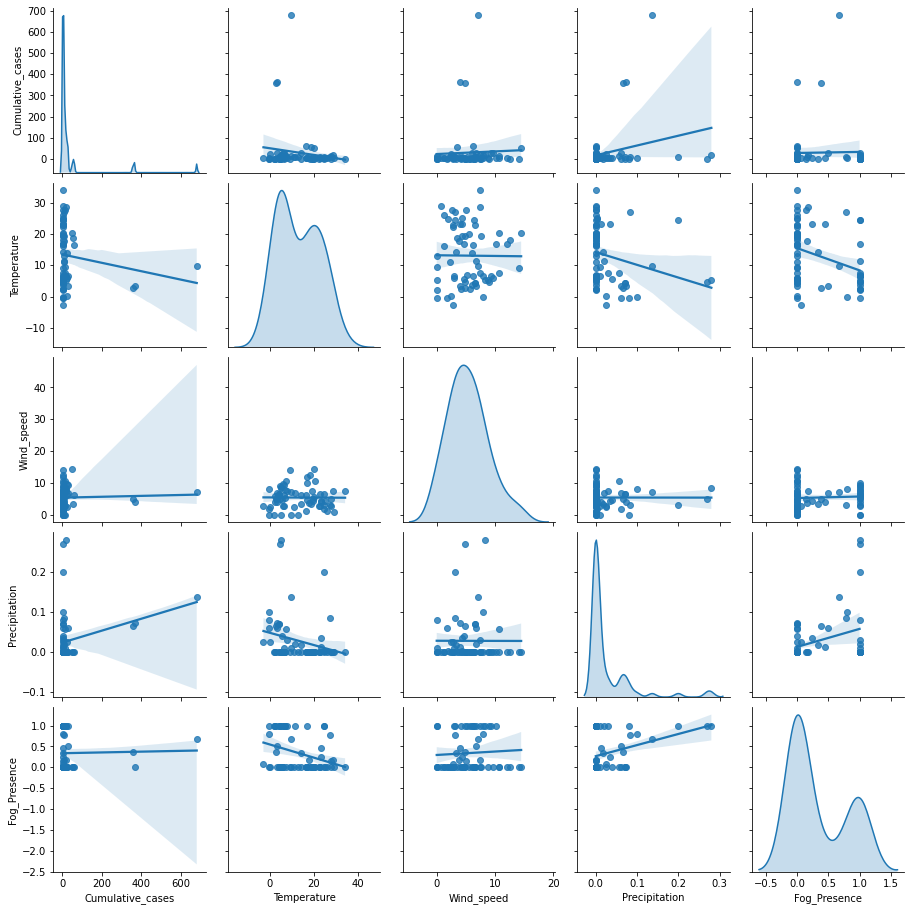

In [29]:
sns.pairplot(new_df, diag_kind="kde", kind="reg", vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])

In [14]:
pf1.resample('SM').mean()

,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,,,,
2020-01-15,73.839793,1.746770,19.832041,0.431525,28.922881,105.141737,6.266305,4.651680,0.063282,0.341085
2020-01-31,510.519651,15.956332,36.484716,1.000000,29.537801,77.625871,9.009563,5.174236,0.033712,0.349345


In [ ]:
#Work on later cases (15 days again)

In [18]:
pf3= pf['03-15-2020':'03-30-2020']

In [19]:
pf3.head()

,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,,,,,,
2020-03-15,NaN,Afghanistan,16,0,5,0,33.0,65.0,4.50,9.0,0.00,0
2020-03-16,NaN,Afghanistan,21,0,5,0,33.0,65.0,4.50,9.0,0.00,0
2020-03-17,NaN,Afghanistan,22,0,1,0,33.0,65.0,6.56,4.8,0.04,1
2020-03-18,NaN,Afghanistan,22,0,0,0,33.0,65.0,6.56,4.8,0.04,1
2020-03-19,NaN,Afghanistan,22,0,0,0,33.0,65.0,7.33,5.3,0.31,1


In [20]:
pf4 = pf3.drop(['State','Daily_cases','Daily_death','Latitude','Longitude'], axis=1)

In [29]:
pf4.head(50)

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Date,,,,,,,
2020-03-15,Afghanistan,16,0,4.50,9.0,0.00,0
2020-03-16,Afghanistan,21,0,4.50,9.0,0.00,0
2020-03-17,Afghanistan,22,0,6.56,4.8,0.04,1
2020-03-18,Afghanistan,22,0,6.56,4.8,0.04,1
2020-03-19,Afghanistan,22,0,7.33,5.3,0.31,1
2020-03-20,Afghanistan,24,0,4.11,4.8,1.22,1
2020-03-21,Afghanistan,24,0,5.78,2.7,2.20,1
2020-03-22,Afghanistan,40,1,7.06,7.5,0.00,1
2020-03-23,Afghanistan,40,1,7.22,7.3,0.47,1


In [22]:
#Mean for each group of countries
country_list = pf4['Country'].unique()
cumulated_cases = []
deaths = []
temperature = []
wind = []
precipitation = []
fog = []

for country in country_list:
    country_wise = pf4['Country'] == country  
    test_data = pf4[country_wise]
    
    cumulated_cases.append(test_data['Cumulative_cases'].mean())
    deaths.append(test_data['Cumulative_death'].mean())
    temperature.append(test_data['Temperature'].mean())
    wind.append(test_data['Wind_speed'].mean())
    precipitation.append(test_data['Precipitation'].mean())
    fog.append(test_data['Fog_Presence'].mean())
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Country' : country_list, 'Cumulative_cases' : cumulated_cases, 'Cumulative_death' : deaths, 'Temperature':temperature,'Wind_speed':wind,'Precipitation':precipitation,'Fog_Presence':fog}
country_dataset = pd.DataFrame(country_dataset)    

In [23]:
country_dataset.head()

,Country,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
0,Afghanistan,62.062500,1.562500,5.146875,5.612500,0.779375,0.875000
1,Albania,116.937500,4.500000,12.493750,3.006250,0.050000,0.437500
2,Algeria,242.125000,17.125000,22.978750,8.318750,0.000000,0.000000
3,Andorra,149.875000,1.687500,2.073125,2.400000,0.015000,0.000000
4,Angola,3.727273,0.363636,28.393636,6.509091,0.000000,0.181818


In [24]:
country_dataset.corr()

,Cumulative_cases,Cumulative_death,Temperature,Wind_speed,Precipitation,Fog_Presence
Cumulative_cases,1.000000,0.918290,-0.171058,0.004409,-0.009468,-0.031184
Cumulative_death,0.918290,1.000000,-0.099194,-0.004766,-0.000492,-0.019194
Temperature,-0.171058,-0.099194,1.000000,-0.096561,0.071941,-0.068356
Wind_speed,0.004409,-0.004766,-0.096561,1.000000,-0.067170,-0.056166
Precipitation,-0.009468,-0.000492,0.071941,-0.067170,1.000000,0.348320
Fog_Presence,-0.031184,-0.019194,-0.068356,-0.056166,0.348320,1.000000


In [31]:
pf5 = country_dataset.drop('Country', axis=1)

In [40]:
#Standardization

In [32]:
from sklearn import preprocessing
# Get column names first
names = pf5.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(pf5)
scaled_df = pd.DataFrame(scaled_df, columns=names)

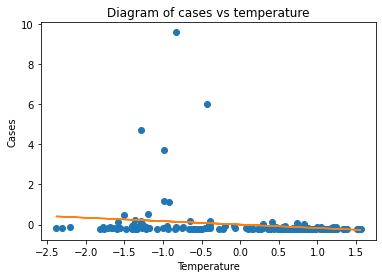

In [34]:
xi = scaled_df.Temperature
y = scaled_df.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [41]:
#Remove outliers with z-score

In [38]:
z_scores = stats.zscore(pf5)
#calculate z-scores of `pf5`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = pf5[filtered_entries]

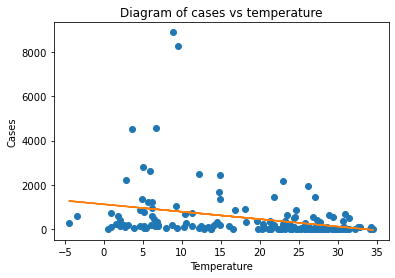

In [39]:
xi = new_df.Temperature
y = new_df.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [42]:
#With the outliers

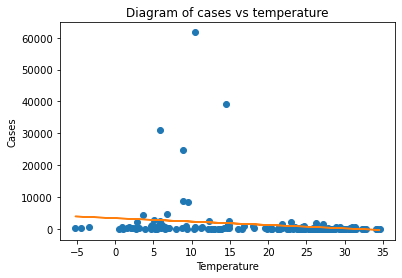

In [28]:

xi = country_dataset.Temperature
y = country_dataset.Cumulative_cases

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

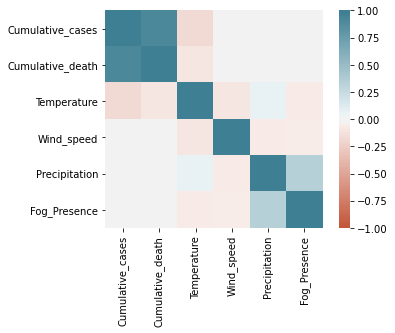

In [72]:
corr = country_dataset.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

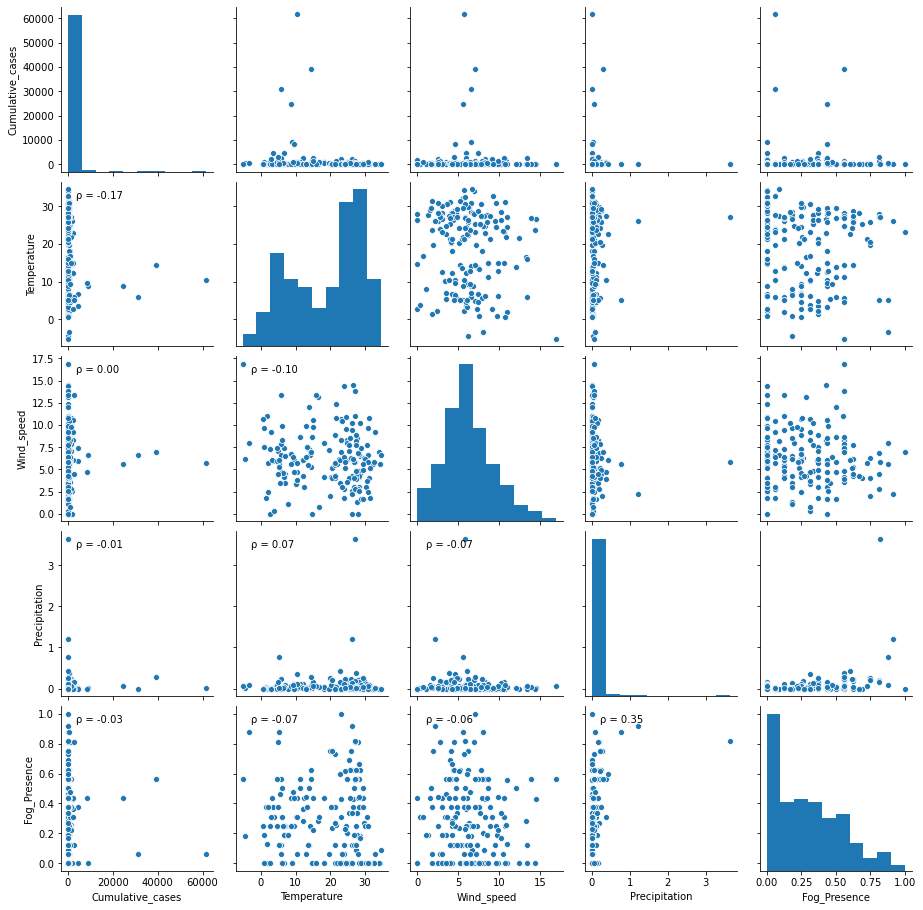

In [73]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(country_dataset, vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

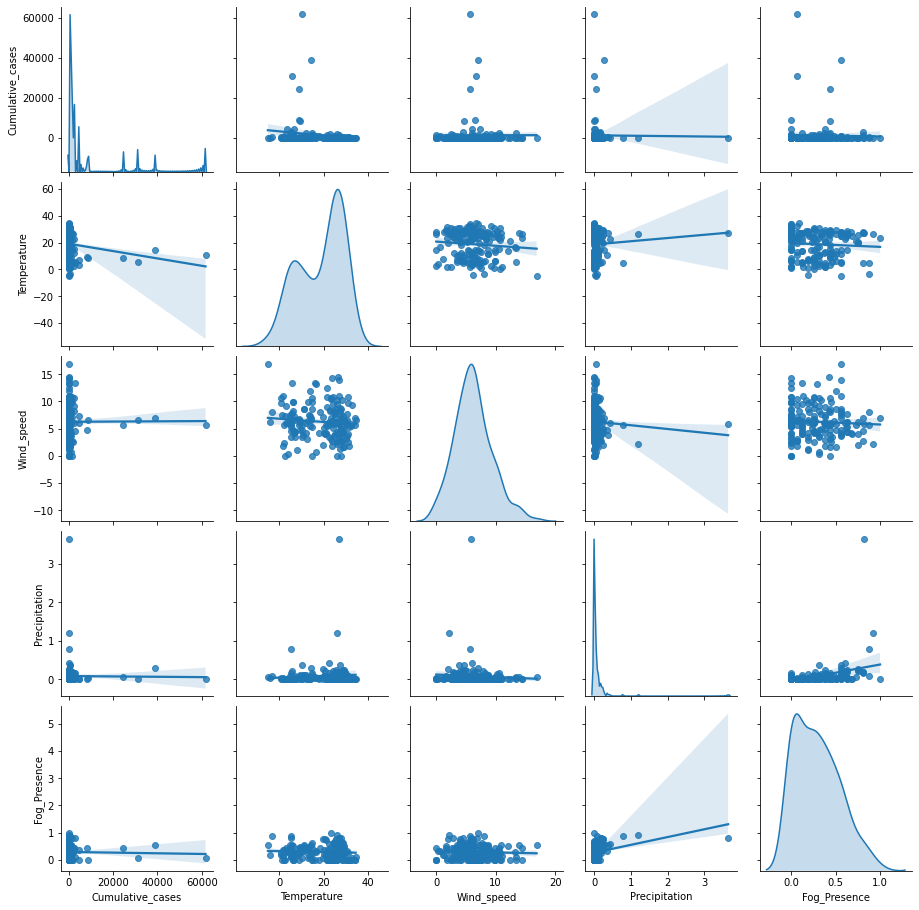

In [75]:
sns.pairplot(country_dataset, diag_kind="kde", kind="reg", vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])

In [22]:
df_compress = df.dropna(0).select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_compress['Cumulative_cases'] = df['Cumulative_cases']

In [23]:
# Now we select the columns that interest us
cols_of_interest = ['Cumulative_cases','Cumulative_death','Temperature','Wind_speed','Precipitation','Fog_Presence']
df_compress = df_compress[cols_of_interest]

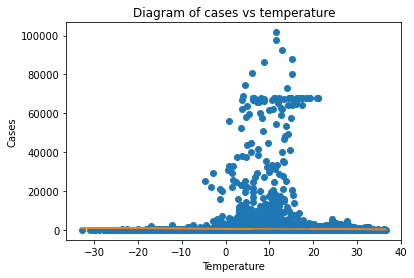

In [27]:
xi = df.Temperature
y = df.Cumulative_cases
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Cases")
plt.title('Diagram of cases vs temperature')
ax = plt.gca()
fig = plt.gcf()

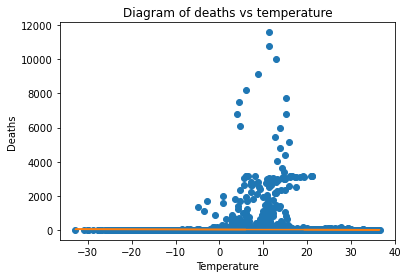

In [9]:
xi = df.Temperature
y = df.Cumulative_death
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.plot(xi,y,'o', xi, line)
plt.xlabel("Temperature")
plt.ylabel("Deaths")
plt.title('Diagram of deaths vs temperature')
ax = plt.gca()
fig = plt.gcf()

In [6]:
#Covariance

In [4]:
df.Temperature.cov(df.Cumulative_cases)

-1586.9217184185782

In [5]:
df.Temperature.cov(df.Cumulative_death)

-54.529807901380295

In [7]:
#Correlation

In [8]:
df.Temperature.corr(df.Cumulative_cases)

-0.02983752100786207

In [9]:
df.Temperature.corr(df.Cumulative_death)

-0.016696637151717496

In [10]:
#Spearman correlation

In [11]:
spearmanr(df.Cumulative_cases,df.Temperature)

SpearmanrResult(correlation=-0.10969605543200833, pvalue=2.3875823081976858e-55)

In [12]:
spearmanr(df.Cumulative_death,df.Temperature)

SpearmanrResult(correlation=-0.08949692008850194, pvalue=2.3374329911646687e-37)

In [18]:
#Pearson correlation

In [14]:
from scipy.stats import pearsonr

In [15]:
pearsonr(df.Cumulative_cases,df.Temperature)

(-0.029837521007865304, 2.131794731134829e-05)

In [16]:
pearsonr(df.Cumulative_death,df.Temperature)

(-0.016696637151714405, 0.0173964143224184)

In [19]:
#Pearson correlation
np.corrcoef(df.Temperature,df.Cumulative_cases)

array([[ 1.        , -0.02983752],
       [-0.02983752,  1.        ]])

In [20]:
#Kelndall correlation
import scipy.stats

In [21]:
scipy.stats.kendalltau(df.Temperature,df.Cumulative_cases)

KendalltauResult(correlation=-0.08089687889732562, pvalue=7.218873637713515e-56)

In [22]:
#These functions return objects that contain two values:

#The correlation coefficient
#The p-value
#You use the p-value in statistical methods when you’re testing a hypothesis. 
#The p-value is an important measure that requires in-depth knowledge
#of probability and statistics to interpret.

In [23]:
#Linear regression
#.slope: the slope of the regression line
#.intercept: the intercept of the regression line
#.pvalue: the p-value
#.stderr: the standard error of the estimated gradient

In [24]:
result = scipy.stats.linregress(df.Temperature,df.Cumulative_cases)

In [25]:
result.slope

-10.560453028353756

In [26]:
result.intercept

625.0814498435616

In [27]:
result.rvalue

-0.029837521007862067

In [28]:
 result.pvalue

2.1317947311524572e-05

In [29]:
result.stderr

2.483866175314034

In [33]:
slope, intercept, r, p, stderr = scipy.stats.linregress(df.Temperature,df.Cumulative_cases)

In [34]:
line = f'Regression line: Cumulative_cases={intercept:.2f}+{slope:.2f}Temperature, r={r:.2f}'
line 

'Regression line: Cumulative_cases=625.08+-10.56Temperature, r=-0.03'

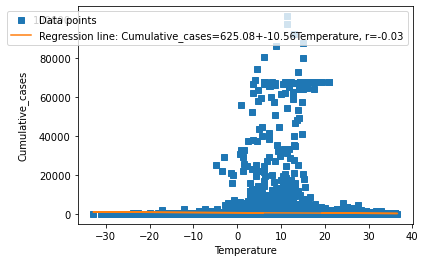

In [35]:
fig, ax = plt.subplots()
ax.plot(df.Temperature,df.Cumulative_cases , linewidth=0, marker='s', label='Data points')
ax.plot(df.Temperature, intercept + slope * df.Temperature, label=line)
ax.set_xlabel('Temperature')
ax.set_ylabel('Cumulative_cases')
ax.legend(facecolor='white')
plt.show()

In [10]:
df.corr()

,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
Cumulative_cases,1.000000,0.878909,0.645463,0.654677,0.055638,0.061438,-0.029838,-0.010954,0.009051,0.005643
Cumulative_death,0.878909,1.000000,0.592193,0.832733,0.039053,0.037158,-0.016697,-0.009460,0.005628,-0.004851
Daily_cases,0.645463,0.592193,1.000000,0.787458,0.071302,-0.002657,-0.041805,-0.007755,0.005465,0.001412
Daily_death,0.654677,0.832733,0.787458,1.000000,0.047311,0.005149,-0.021440,-0.008650,0.004904,-0.013628
Latitude,0.055638,0.039053,0.071302,0.047311,1.000000,-0.252757,-0.732168,0.083349,-0.073881,0.051949
Longitude,0.061438,0.037158,-0.002657,0.005149,-0.252757,1.000000,0.110302,-0.098196,0.051618,-0.006927
Temperature,-0.029838,-0.016697,-0.041805,-0.021440,-0.732168,0.110302,1.000000,-0.018319,0.026476,-0.094597
Wind_speed,-0.010954,-0.009460,-0.007755,-0.008650,0.083349,-0.098196,-0.018319,1.000000,0.010947,0.102751
Precipitation,0.009051,0.005628,0.005465,0.004904,-0.073881,0.051618,0.026476,0.010947,1.000000,0.197865
Fog_Presence,0.005643,-0.004851,0.001412,-0.013628,0.051949,-0.006927,-0.094597,0.102751,0.197865,1.000000


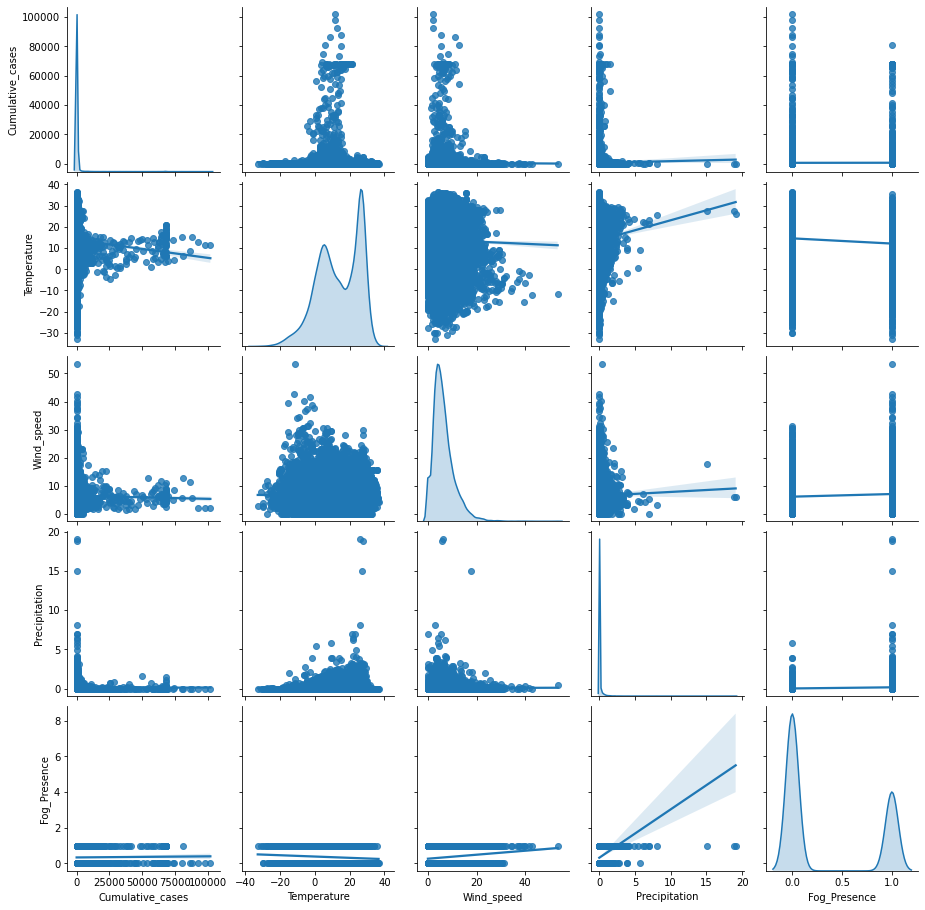

In [13]:
sns.pairplot(df, diag_kind="kde", kind="reg", vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])

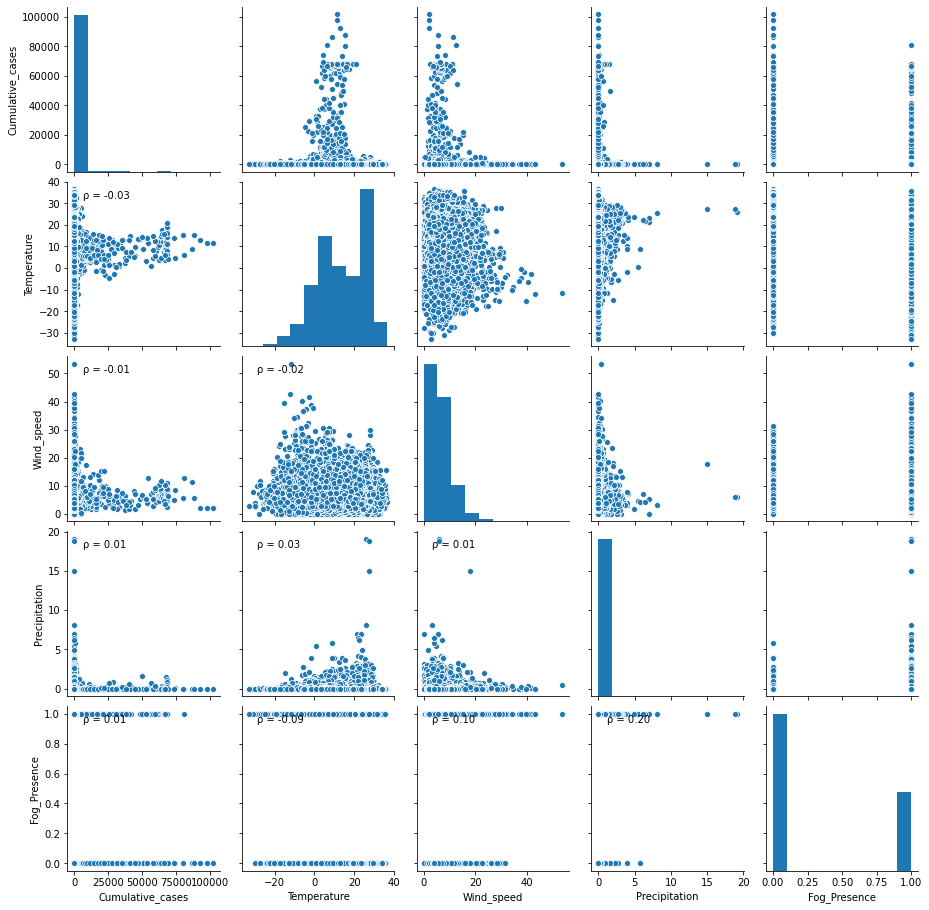

In [14]:

from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df, vars=["Cumulative_cases","Temperature","Wind_speed","Precipitation","Fog_Presence"])
g.map_lower(corrfunc)
plt.show()

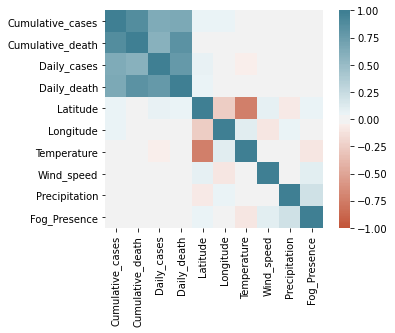

In [15]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

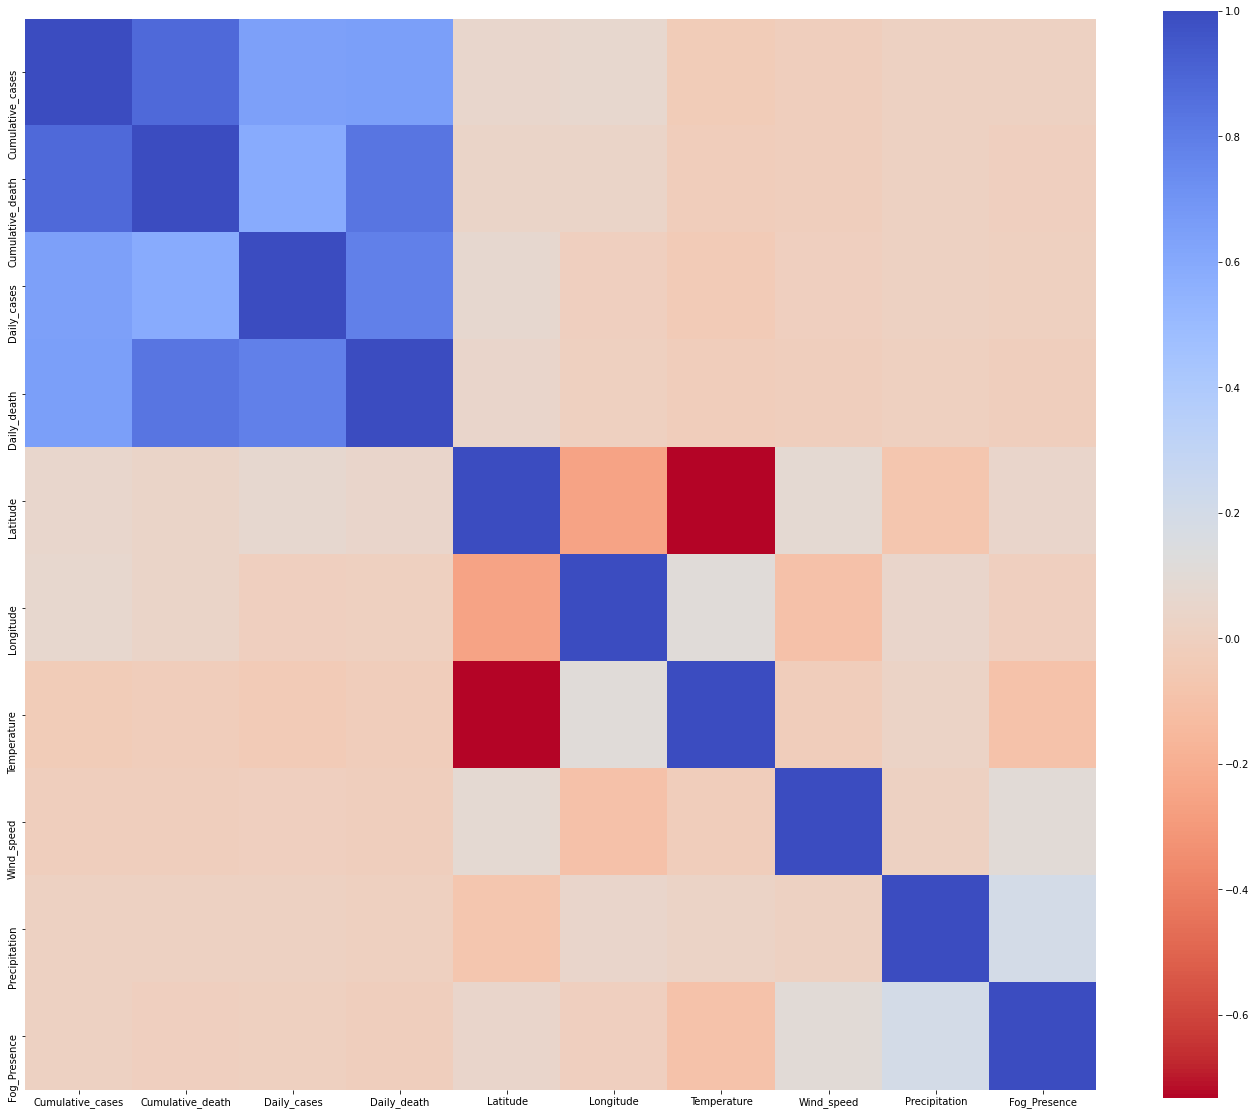

In [16]:

# calculate the correlation matrix
corr = df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)

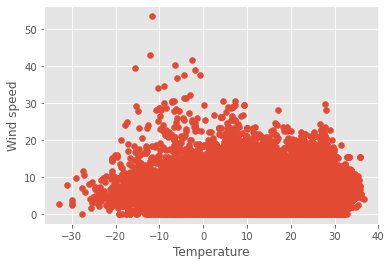

In [17]:
matplotlib.style.use('ggplot')

plt.scatter(df.Temperature, df.Wind_speed)
plt.xlabel("Temperature")
plt.ylabel("Wind speed")
plt.show()

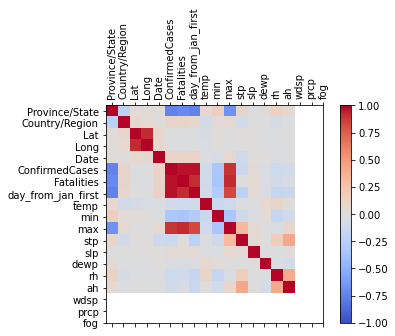

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\weather_week1.csv", index_col=0)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [2]:
#This is the second dataset with information such as temperature,minimum and maximum temperature as well as the mean
#mean station pressure,mean see level pressure,absolute humidity,relative humidity,
#mean dew point,mean wind speed,precipitation and fog

In [20]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\weather_week1.csv")
df = data.copy()

In [21]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


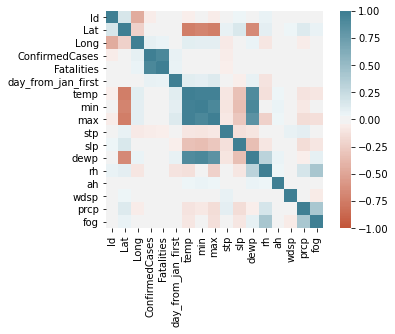

In [22]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

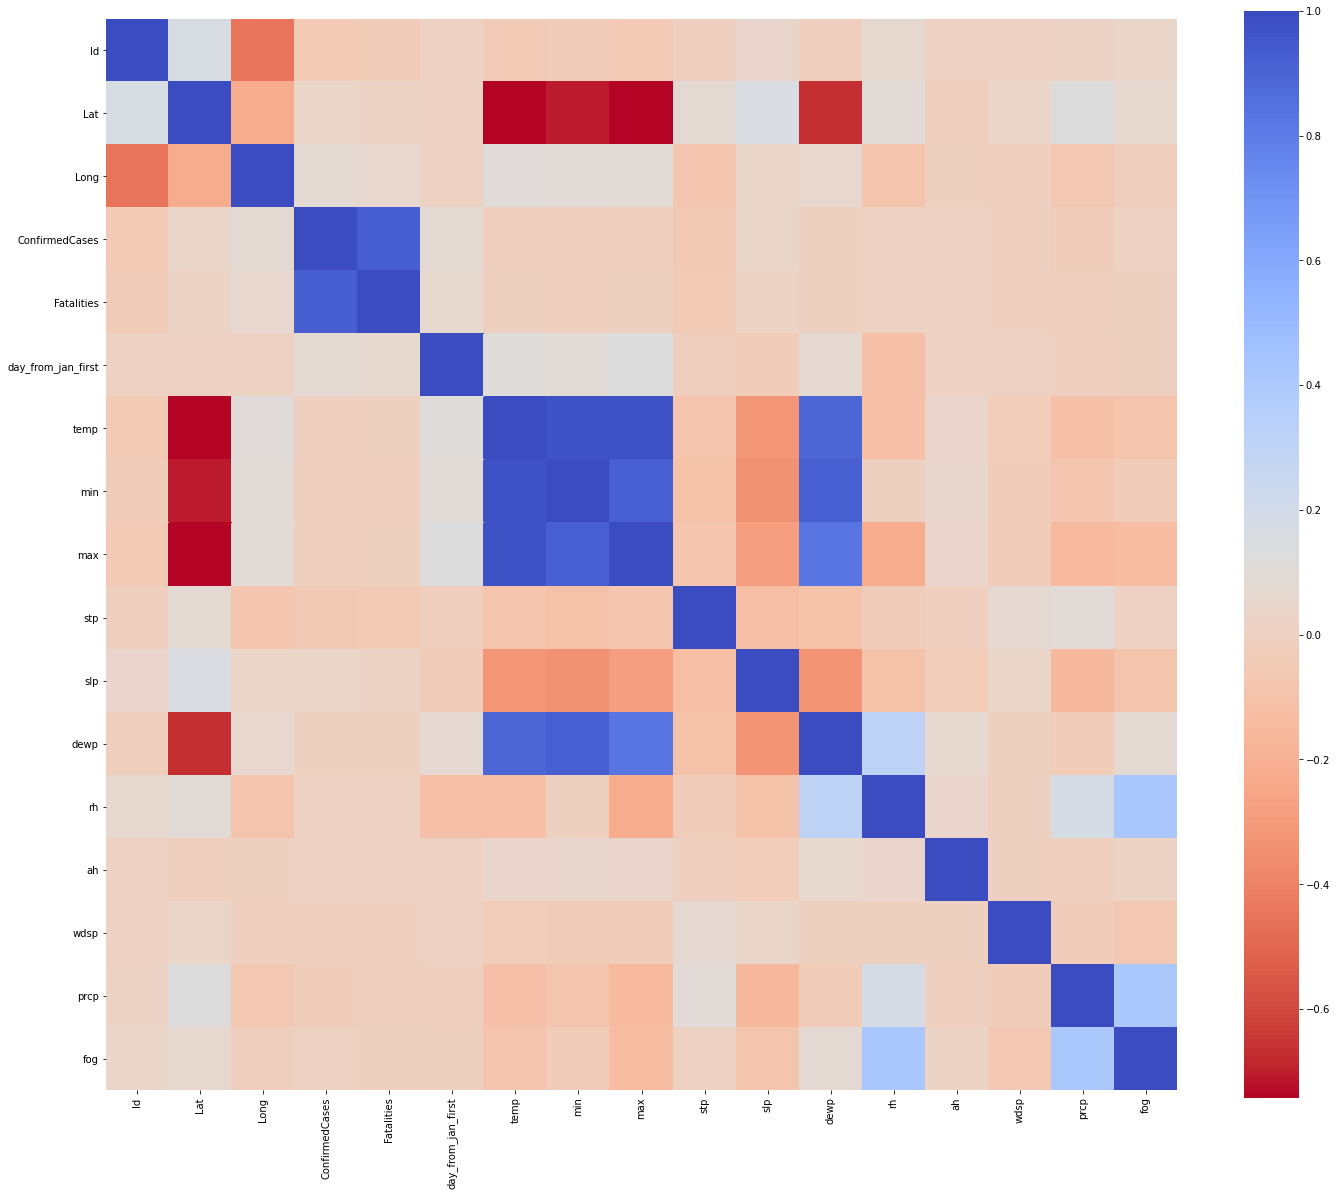

In [23]:
# calculate the correlation matrix
corr = df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)

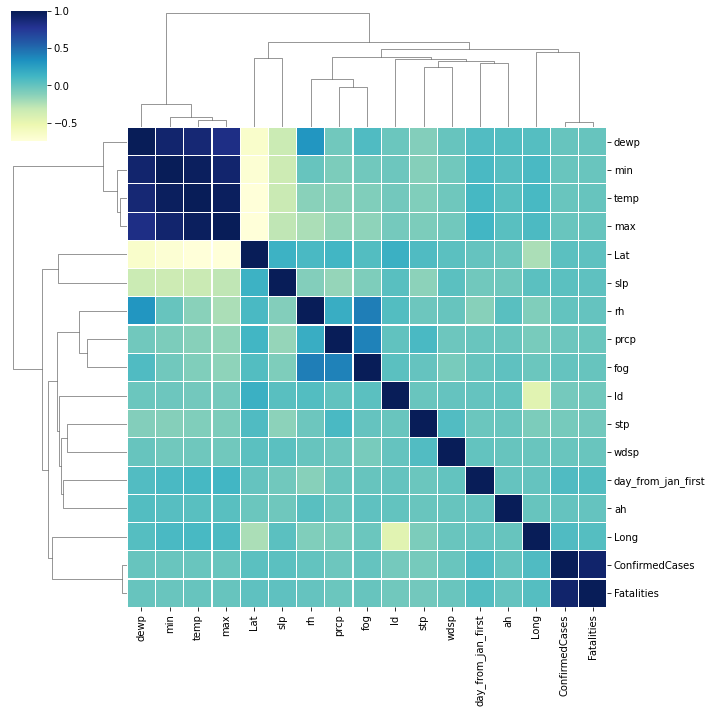

In [24]:

corrmat = data.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

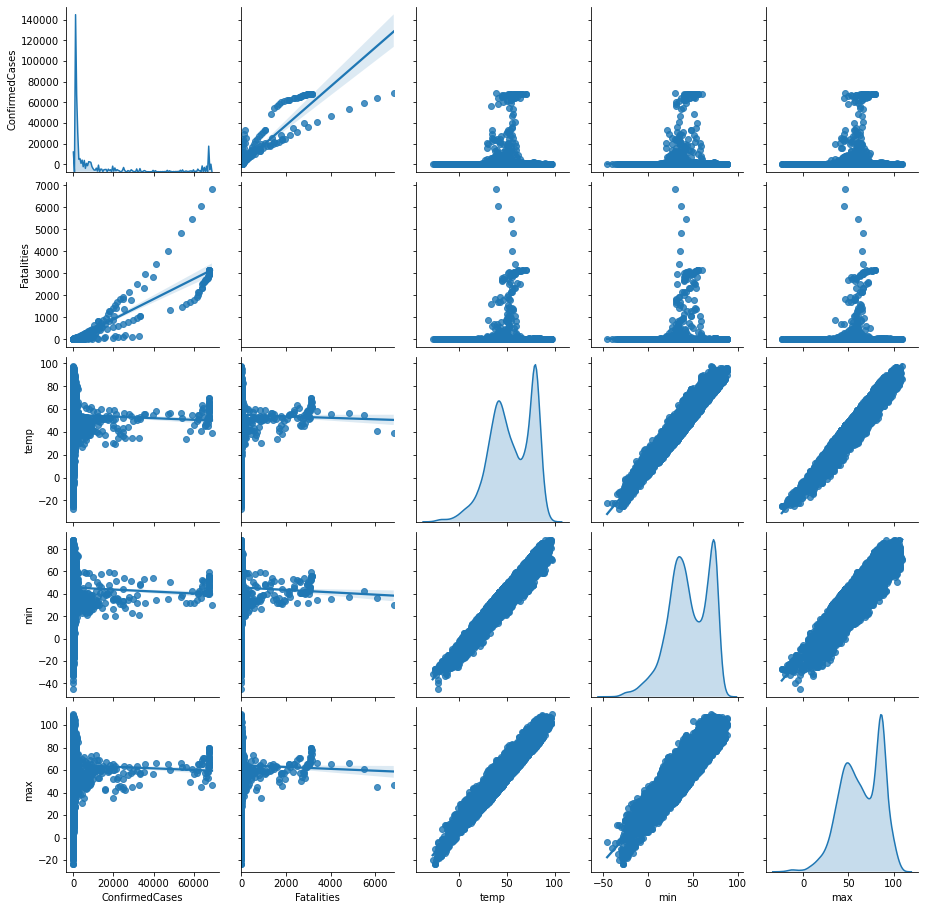

In [33]:
sns.pairplot(df, diag_kind="kde", kind="reg", vars=['ConfirmedCases','Fatalities','temp','min','max'])

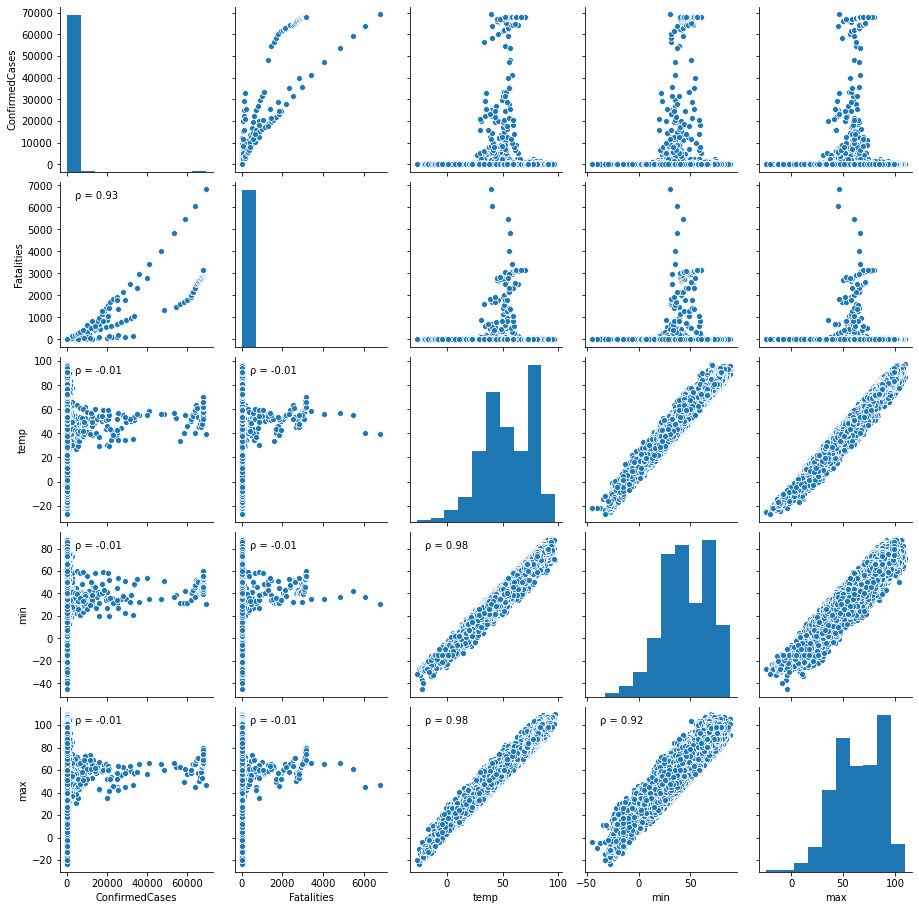

In [30]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(df, vars=['ConfirmedCases','Fatalities','temp','min','max'])
g.map_lower(corrfunc)
plt.show()

In [31]:
#,'stp','slp','dewp','rh','ah','wdsp','prcp','fog'

In [3]:
#Thind dataset i found with extra information about the conditions of patients

In [15]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\Afghanistan.csv")                       
df = data.copy()

In [16]:
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,...,Confirmed Cases/1000,Lung Patients (F),Lung Patients (M),Median Age (Years),Life Expectancy (M),Life Expectancy (F),Total_tests_conducted,Out_Travels (mill.),In_travels(mill.),Domestic_Travels (mill.)
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33,65,5.89,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33,65,5.56,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33,65,4.50,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33,65,7.78,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33,65,6.00,...,0.0,36.31,39.33,18.4,63.2,63.6,1019,1.561605,Not Reported,Not Reported


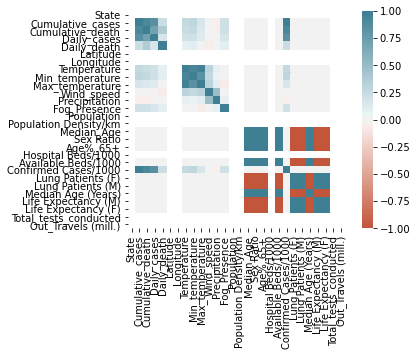

In [17]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True)

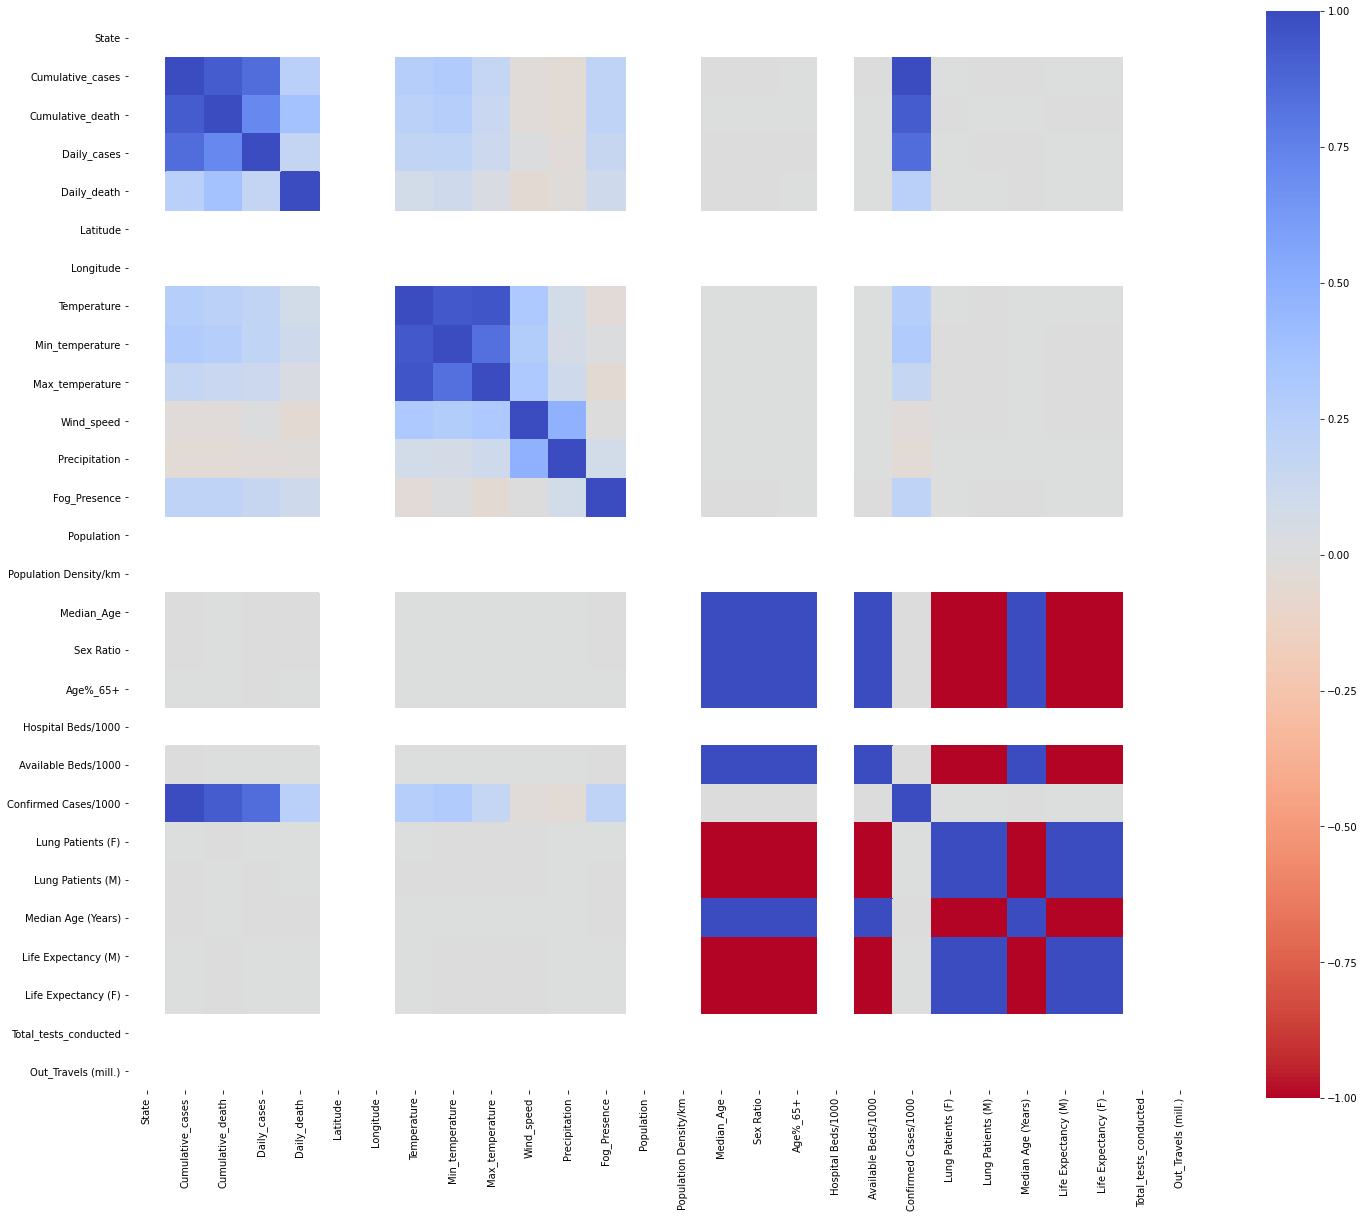

In [18]:
# calculate the correlation matrix
corr = df.corr()
f, ax2 = plt.subplots(1, figsize=(24,20))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2,
        square=True)